In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bike-sharing-demand/test.csv
/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv


In [2]:
test = pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [3]:
train = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train['datetime'] = train['datetime'].astype('datetime64')
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [5]:
test['datetime'] = test['datetime'].astype('datetime64')
test.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object

In [6]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['dayofweek'] = train['datetime'].dt.dayofweek
train['hour'] = train['datetime'].dt.hour
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


In [7]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['dayofweek'] = test['datetime'].dt.dayofweek
test['hour'] = test['datetime'].dt.hour
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

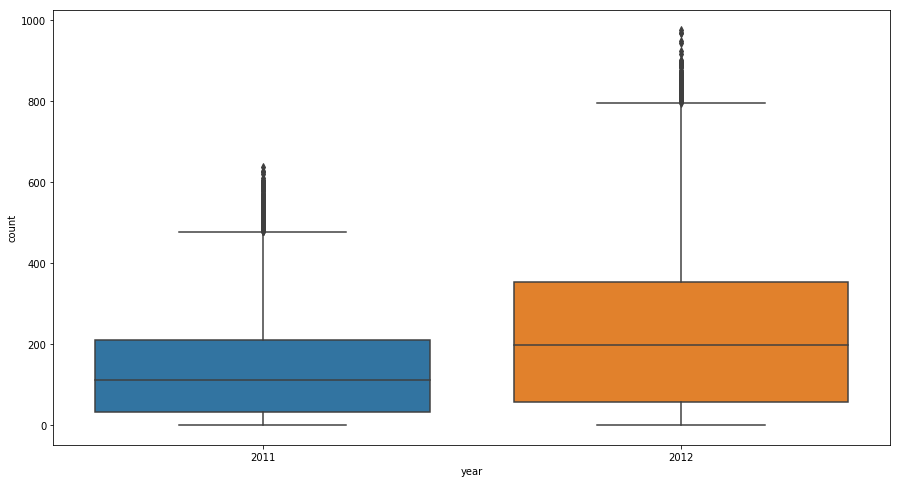

In [9]:
a,b = plt.subplots(1,1, figsize=(15,8))
sns.boxplot(x=train['year'], y=train['count'])

In [10]:
train.shape

(10886, 17)

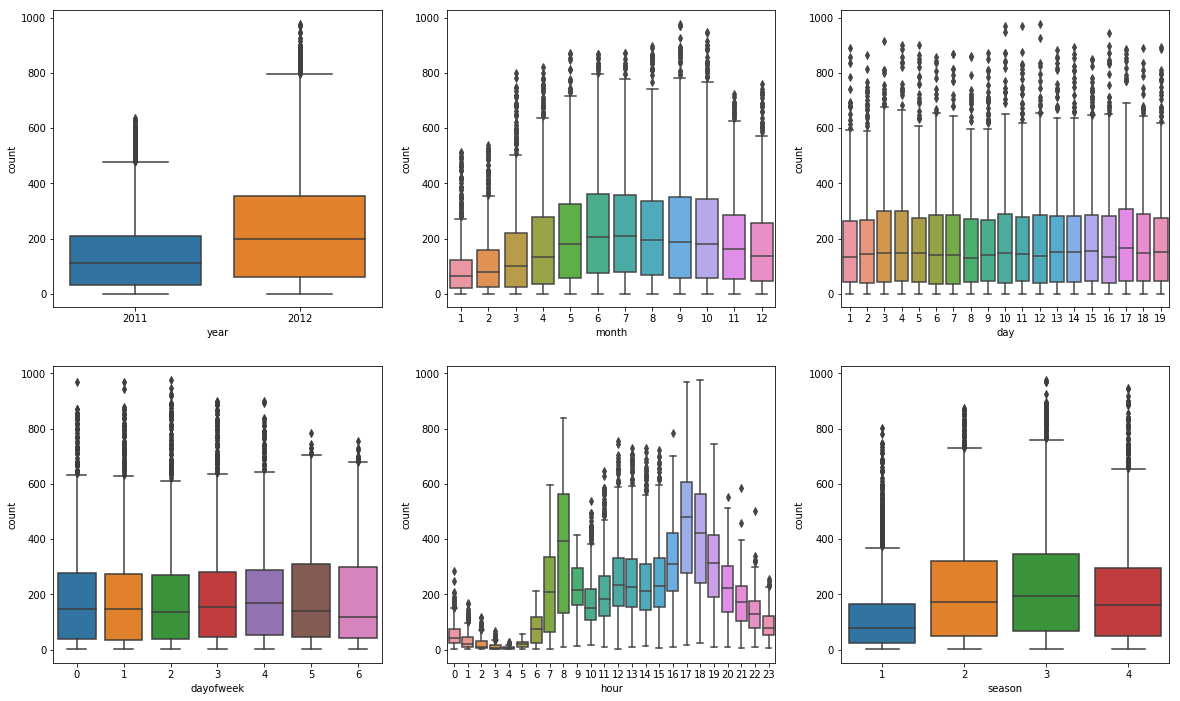

In [11]:
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)
sns.boxplot(x = 'year', y = 'count', data = train, ax=ax1) #유의미
sns.boxplot(x = 'month', y = 'count', data = train, ax=ax2) # 무의미, season이 이미 포함, 12등분하면 overfitting
sns.boxplot(x = 'day', y = 'count', data = train, ax=ax3) # 무의미, why 19일까지? 
sns.boxplot(x = 'dayofweek', y = 'count', data = train, ax=ax4) #유의미
sns.boxplot(x = 'hour', y = 'count', data = train, ax=ax5) #유의미
sns.boxplot(x = 'season', y = 'count', data = train, ax=ax6) #유의미

# 하나의 범주가 다른 범주에 포함되지 않는지? e.g. month > season, month는 season에 포함
# 데이터가 완전체인지 확인하자
# 데이터 범주대로 나누면 overfitting 우려가 없는지 e.g. month의 경우 약 10,000개의 data를 나누면 각 month 당 약 1,000개의 data만 가지고 있어 over fitting

In [12]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


In [13]:
y = train['count']

In [14]:
train = train.drop(['datetime', 'registered', 'casual','count','month', 'day'], axis=1)

In [15]:
train = train.drop([ 'casual'], axis=1)

KeyError: "['casual'] not found in axis"

In [16]:
test = test.drop(['datetime','month', 'day'], axis=1)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,dayofweek,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,3,4


In [17]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,2011,5,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,5,1
2,1,0,0,1,9.02,13.635,80,0.0,2011,5,2
3,1,0,0,1,9.84,14.395,75,0.0,2011,5,3
4,1,0,0,1,9.84,14.395,75,0.0,2011,5,4


In [18]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()

In [19]:
lgbm.fit(train, np.log(y))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [20]:
pred = lgbm.predict(test)

In [21]:
sample = pd.read_csv('/kaggle/input/bike-sharing-demand/sampleSubmission.csv')
sample.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [22]:
sample['count'] = np.exp(pred)

In [23]:
sample.to_csv('baseline_final.csv', index = False)
sample.head()

,datetime,count
0,2011-01-20 00:00:00,10.230455
1,2011-01-20 01:00:00,4.962407
2,2011-01-20 02:00:00,2.955541
3,2011-01-20 03:00:00,2.062522
4,2011-01-20 04:00:00,1.767986


In [24]:
sample['count'].head(50)

0      10.230455
1       4.962407
2       2.955541
3       2.062522
4       1.767986
5       5.913558
6      32.126699
7     102.568077
8     225.863762
9     135.115509
10     57.983717
11     61.253374
12     81.488911
13     72.575101
14     73.207675
15     77.964430
16     96.255592
17    196.437868
18    168.589251
19    109.016581
20     74.839603
21     52.829065
22     36.042388
23     23.946817
24     12.111500
25      6.177675
26      3.449900
27      1.657206
28      1.813992
29      3.669669
30     30.761785
31     84.033244
32    198.207633
33    117.591548
34     50.713435
35     62.278725
36     71.709144
37     63.814226
38     61.789620
39     64.692735
40     78.629789
41    109.601438
42    104.684530
43     72.737307
44     55.355475
45     41.582425
46     30.401065
47     22.759551
48     25.391568
49     18.088556
Name: count, dtype: float64